# Prediction for New York City Taxi Trip Duration

The dataset is based on the 2016 NYC Yellow Cab trip record data originally published by the NYC Taxi and Limousine Commission (TLC). Based on individual trip attributes, we are going to predict the duration of each trip in the test set.

In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [2]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [3]:
print(train.shape)
print(test.shape)

(1458644, 11)
(625134, 9)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [5]:
train["trip_duration"].describe()

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

In [6]:
train["passenger_count"].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
8          1
9          1
Name: passenger_count, dtype: int64

Let's remove the row which have 0 for passenger_count later on.

In [7]:
train["vendor_id"].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

In [8]:
test["vendor_id"].value_counts()

2    334374
1    290760
Name: vendor_id, dtype: int64

## Data Preprocessing

In [9]:
train.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [10]:
test.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

- There is no null value

In [11]:
train = train[train["passenger_count"] != 0]

In [12]:
# Convert the data type to datetime to analyze hourly and monthly data
train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [13]:
# hourly
train["hour"] = train["pickup_datetime"].dt.hour
test["hour"] = test["pickup_datetime"].dt.hour

In [14]:
# monthly
train["month"] = train["pickup_datetime"].dt.month
test["month"] = test["pickup_datetime"].dt.month

In [15]:
# DayofWeek
train["dayofweek"] = train["pickup_datetime"].dt.dayofweek
test["dayofweek"] = test["pickup_datetime"].dt.dayofweek

In [16]:
train["longitude_distance"] = abs(train["pickup_longitude"] - train["dropoff_longitude"])
test["longitude_distance"] = abs(test["pickup_longitude"] - test["dropoff_longitude"])

In [17]:
train["latitude_distance"] = abs(train["pickup_latitude"] - train["dropoff_latitude"])
test["latitude_distance"] = abs(test["pickup_latitude"] - test["dropoff_latitude"])

- Since distance is good measurement for trip duration, we calculated the distances using longitude and latitude data.
- We will normalize this data later on.

In [18]:
# Convert the object data type to the category data type
train["store_and_fwd_flag"] = train["store_and_fwd_flag"].astype('category')
test["store_and_fwd_flag"] = test["store_and_fwd_flag"].astype('category')
# Create dummy columns and add back to the dataframe
train = pd.concat([train, pd.get_dummies(train["store_and_fwd_flag"])], axis=1)
test = pd.concat([test, pd.get_dummies(test["store_and_fwd_flag"])], axis=1)

In [19]:
# Revove unnecessary columns
train = train.drop(["pickup_datetime", "dropoff_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", 
                    "dropoff_latitude", "store_and_fwd_flag"], axis=1)
test = test.drop(["pickup_datetime", "pickup_longitude", "pickup_latitude", "dropoff_longitude", 
                    "dropoff_latitude", "store_and_fwd_flag"], axis=1)

## Data Exploration

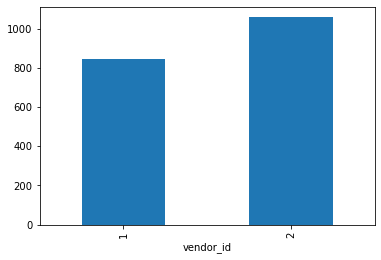

In [20]:
import matplotlib.pyplot as plt
train.groupby("vendor_id").mean()["trip_duration"].plot.bar()
plt.show()

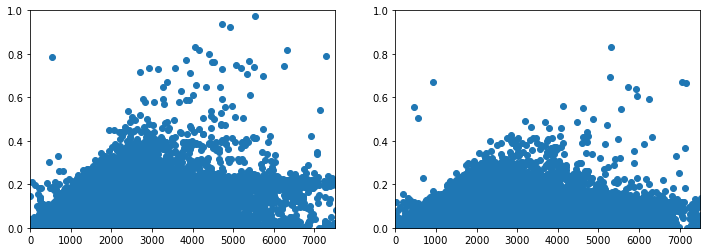

In [21]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(train["trip_duration"], train["longitude_distance"])
plt.xlim(0, 7500)
plt.ylim(0, 1)


plt.subplot(1, 2, 2)
plt.scatter(train["trip_duration"], train["latitude_distance"])
plt.xlim(0, 7500)
plt.ylim(0, 1)

plt.show()

We can that the trip durations increase proportionally in some case when the distance increase.
However, in many cases, the duration is long regardless of the distance. It shows that other factors such as traffic congestion, whether, etc affect the trip duration.

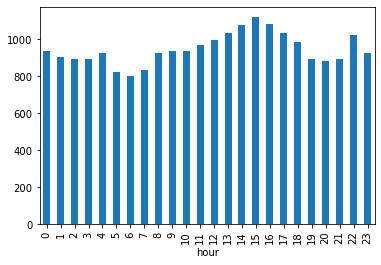

In [22]:
train.groupby("hour").mean()["trip_duration"].plot.bar()
plt.show()

We can see that the trip durations are short during the night and long during the daytime. 

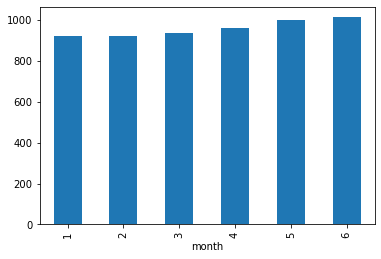

In [23]:
train.groupby("month").mean()["trip_duration"].plot.bar()
plt.show()

We can assume that there is more traffic when it's warm. 

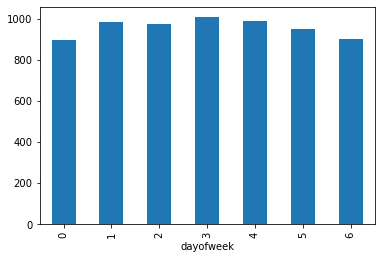

In [24]:
train.groupby("dayofweek").mean()["trip_duration"].plot.bar()
plt.show()

- 0: Sunday, 6: Saturday
- Trip durations tend to be short at weekend. 

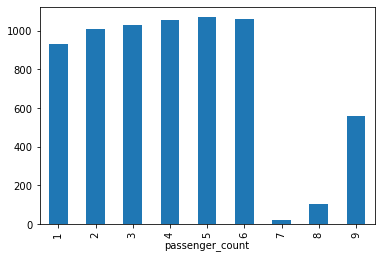

In [25]:
train.groupby("passenger_count").mean()["trip_duration"].plot.bar()
plt.show()

## Modeling

In [26]:
# Normalize numeric values 
from sklearn.preprocessing import minmax_scale

numeric_columns = ["passenger_count", "longitude_distance", "latitude_distance"]

for col in numeric_columns:
    train[col + "_scaled"] = minmax_scale(train[col])
    test[col + "_scaled"] = minmax_scale(test[col])

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458584 entries, 0 to 1458643
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   id                         1458584 non-null  object 
 1   vendor_id                  1458584 non-null  int64  
 2   passenger_count            1458584 non-null  int64  
 3   trip_duration              1458584 non-null  int64  
 4   hour                       1458584 non-null  int64  
 5   month                      1458584 non-null  int64  
 6   dayofweek                  1458584 non-null  int64  
 7   longitude_distance         1458584 non-null  float64
 8   latitude_distance          1458584 non-null  float64
 9   N                          1458584 non-null  uint8  
 10  Y                          1458584 non-null  uint8  
 11  passenger_count_scaled     1458584 non-null  float64
 12  longitude_distance_scaled  1458584 non-null  float64
 13  latitude_dis

In [28]:
# The values in the four columns below don't have order but model may recognize like that so we create dummy variables for them.
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

train = create_dummies(train,"vendor_id")
test = create_dummies(test,"vendor_id")
train = create_dummies(train,"hour")
test = create_dummies(test,"hour")
train = create_dummies(train,"month")
test = create_dummies(test,"month")
train = create_dummies(train,"dayofweek")
test = create_dummies(test,"dayofweek")

In [29]:
# Revove unnecessary columns
train = train.drop(["vendor_id", "hour", "month", "dayofweek"], axis=1)
test = test.drop(["vendor_id", "hour", "month", "dayofweek"], axis=1)

In [30]:
features = [c for c in train.columns if c not in ['trip_duration', 'id']]

In [31]:
all_X = train[features]
all_y = train["trip_duration"]
holdout_X = test[features]

- ## Penalized Regression - Ridge

In [32]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Ridge
ridge = Ridge()
selector = RFECV(ridge,cv=5)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]
all_X_rd = all_X[optimized_columns]
holdout_X_rd = holdout_X[optimized_columns]

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
ridge = Ridge().fit(all_X_rd, all_y)
predictions = ridge.predict(all_X_rd)
mse_value = mean_squared_error(all_y, predictions)
ridge_rmse = np.sqrt(mse_value)
print('RMSE:', ridge_rmse)
print('R-Squared', np.mean(cross_val_score(ridge, all_X_rd, all_y ,cv=5)))

RMSE: 5211.186225431908
R-Squared 0.01602424988533342


In [35]:
holdout_predictions = ridge.predict(holdout_X_rd)

holdout_ids = test["id"]
submission_df = {"id": holdout_ids,
                 "trip_duration": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_rd.csv",index=False)
# 0.68573

- ## Penalized Regression - Lasso

In [36]:
from sklearn.linear_model import Lasso
lasso = Lasso()
selector = RFECV(lasso,cv=5)
selector.fit(all_X,all_y)

optimized_columns = all_X.columns[selector.support_]
all_X_ls = all_X[optimized_columns]
holdout_X_ls = holdout_X[optimized_columns]

In [37]:
lasso = Lasso().fit(all_X_rd, all_y)
predictions = lasso.predict(all_X_rd)
mse_value = mean_squared_error(all_y, predictions)
lasso_rmse = np.sqrt(mse_value)
print('RMSE:', lasso_rmse)
print('R-Squared', np.mean(cross_val_score(lasso, all_X_rd, all_y ,cv=5)))

RMSE: 5211.415571578444
R-Squared 0.01594497209708181


In [38]:
holdout_predictions = lasso.predict(holdout_X_rd)

holdout_ids = test["id"]
submission_df = {"id": holdout_ids,
                 "trip_duration": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_ls.csv",index=False)
# 0.70155

- ## Stochastic Gradient Descent Regression

In [39]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(warm_start=True)
sgd.fit(all_X, all_y)
predictions = sgd.predict(all_X)
mse_value = mean_squared_error(all_y, predictions)
sgd_rmse = np.sqrt(mse_value)
print('RMSE:', sgd_rmse)
print('R-Squared', np.mean(cross_val_score(sgd, all_X, all_y, cv=5)))

RMSE: 5213.7299583594895
R-Squared 0.015463551158967248


In [40]:
holdout_predictions = sgd.predict(holdout_X)

holdout_ids = test["id"]
submission_df = {"id": holdout_ids,
                 "trip_duration": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_sgd.csv",index=False)
# 0.65822

- ## Neural Networks

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(early_stopping=True, random_state=1)
regr.fit(all_X, all_y)
predictions = regr.predict(all_X)
mse_value = mean_squared_error(all_y, predictions)
nn_rmse = np.sqrt(mse_value)

print('RMSE:' , nn_rmse)
print('R-Squared', np.mean(cross_val_score(regr, all_X, all_y, cv=5)))

RMSE: 5206.515200229587
R-Squared 0.019193733141056123


In [42]:
holdout_predictions = regr.predict(holdout_X)

holdout_ids = test["id"]
submission_df = {"id": holdout_ids,
                 "trip_duration": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submission_nn.csv",index=False)
# 0.61418

In [43]:
RMSE=[ridge_rmse, lasso_rmse, sgd_rmse, nn_rmse]
col={'Root Mean Square Error': RMSE}
models=['Ridge','Lasso','SGD', 'Neural Networks']
dfplot=pd.DataFrame(data=col,index=models)
dfplot

,Root Mean Square Error
Ridge,5211.186225
Lasso,5211.415572
SGD,5213.729958
Neural Networks,5206.515200


Neural Networks model has the lowest RMSE so it is our best model.